<a href="https://colab.research.google.com/github/muthikellasrihari/-DECISION-TREE-IMPLEMANTATION/blob/main/DECISION_TREE_VISUALIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ============================================================================
# SECTION 1: IMPORT NECESSARY LIBRARIES
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

print("All libraries imported successfully!")
print("="*60)

All libraries imported successfully!


In [ ]:
# ============================================================================
# SECTION 2: DATASET LOADING
# ============================================================================

# Load the famous Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Target: species (setosa, versicolor, virginica)

# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("DATASET INFORMATION:")
print(f"Dataset shape: {df.shape}")
print(f"Features: {list(iris.feature_names)}")
print(f"Target classes: {list(iris.target_names)}")
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("="*60)


DATASET INFORMATION:
Dataset shape: (150, 6)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 

In [ ]:
# ============================================================================
# SECTION 3: DATA PREPROCESSING
# ============================================================================

print("DATA PREPROCESSING:")

# Check for missing values
print(f"Missing values in dataset: {df.isnull().sum().sum()}")

# Check data distribution
print("\nClass distribution:")
print(df['species_name'].value_counts())

# Since Iris dataset is clean, we don't need to handle missing values
# For categorical encoding, our target is already encoded (0, 1, 2)

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Ensures equal distribution of classes in train/test
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print("Data preprocessing completed!")
print("="*60)


DATA PREPROCESSING:
Missing values in dataset: 0

Class distribution:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Training set size: 120 samples
Testing set size: 30 samples
Data preprocessing completed!


In [ ]:
# ============================================================================
# SECTION 4: MODEL TRAINING
# ============================================================================

print("DECISION TREE MODEL TRAINING:")

# Create and train the Decision Tree classifier
# Setting hyperparameters for optimal performance
dt_classifier = DecisionTreeClassifier(
    criterion='gini',        # Measure of impurity
    max_depth=4,            # Maximum depth to prevent overfitting
    min_samples_split=2,    # Minimum samples required to split a node
    min_samples_leaf=1,     # Minimum samples required at a leaf node
    random_state=42         # For reproducibility
)

# Train the model
dt_classifier.fit(X_train, y_train)

print("Decision Tree model trained successfully!")
print(f"Tree depth: {dt_classifier.get_depth()}")
print(f"Number of leaves: {dt_classifier.get_n_leaves()}")
print("="*60)


DECISION TREE MODEL TRAINING:
Decision Tree model trained successfully!
Tree depth: 4
Number of leaves: 7


DECISION TREE VISUALIZATION:


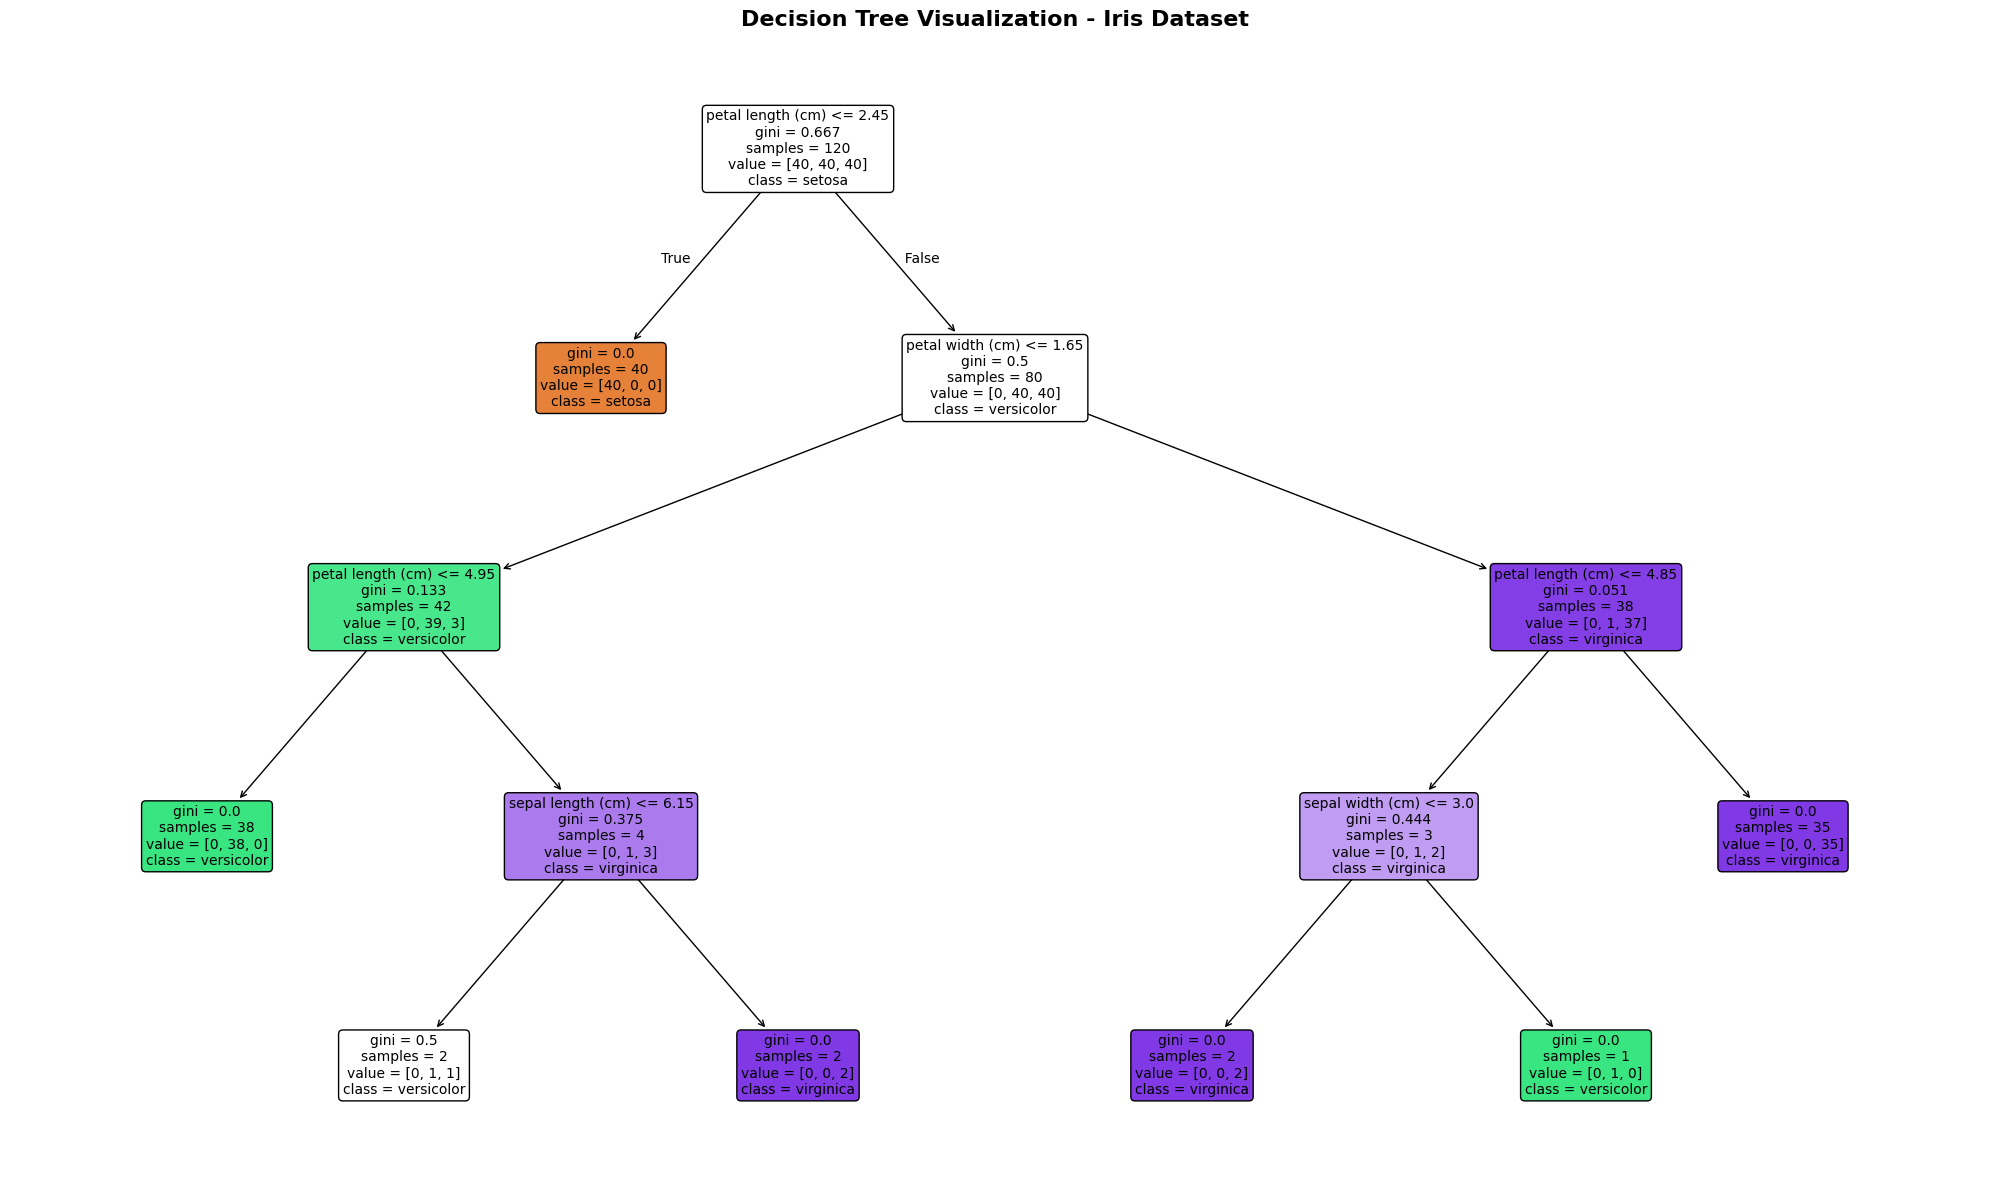

Decision tree visualization completed!


In [ ]:
# ============================================================================
# SECTION 5: MODEL VISUALIZATION
# ============================================================================

print("DECISION TREE VISUALIZATION:")

# Create a large figure for better visibility
plt.figure(figsize=(20, 12))


# Plot the decision tree
plot_tree(dt_classifier,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)

plt.title("Decision Tree Visualization - Iris Dataset", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Decision tree visualization completed!")
print("="*60)



FEATURE IMPORTANCE ANALYSIS:
Feature Importance Scores:
petal length (cm): 0.5656
petal width (cm): 0.4112
sepal width (cm): 0.0169
sepal length (cm): 0.0063


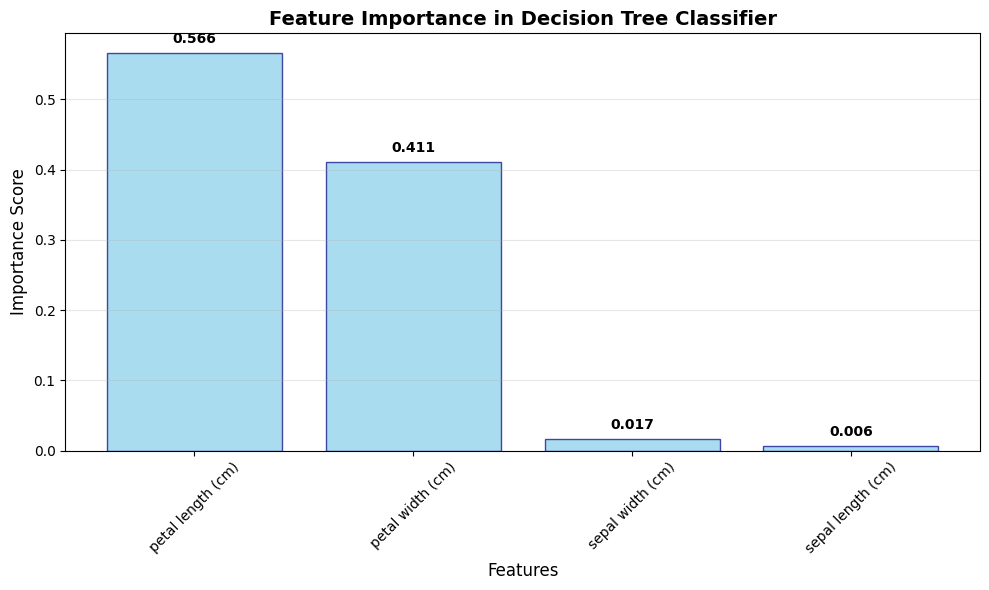

In [ ]:
# ============================================================================
# SECTION 6: FEATURE IMPORTANCE ANALYSIS
# ============================================================================

print("FEATURE IMPORTANCE ANALYSIS:")

# Get feature importance scores
feature_importance = dt_classifier.feature_importances_
feature_names = iris.feature_names

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("Feature Importance Scores:")
for i, row in importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

# Plot feature importance as a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(importance_df['Feature'], importance_df['Importance'],
               color='skyblue', edgecolor='navy', alpha=0.7)

# Add value labels on top of bars
for bar, importance in zip(bars, importance_df['Importance']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{importance:.3f}', ha='center', va='bottom', fontweight='bold')

plt.title('Feature Importance in Decision Tree Classifier', fontsize=14, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance Score', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("="*60)

In [ ]:
# ============================================================================
# SECTION 7: MODEL EVALUATION
# ============================================================================

print("MODEL EVALUATION:")

# Make predictions on test set
y_pred = dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall: {recall:.4f} ({recall*100:.2f}%)")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("="*60)



MODEL EVALUATION:
Model Performance Metrics:
Accuracy: 0.9333 (93.33%)
Precision: 0.9333 (93.33%)
Recall: 0.9333 (93.33%)

Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



CONFUSION MATRIX VISUALIZATION:


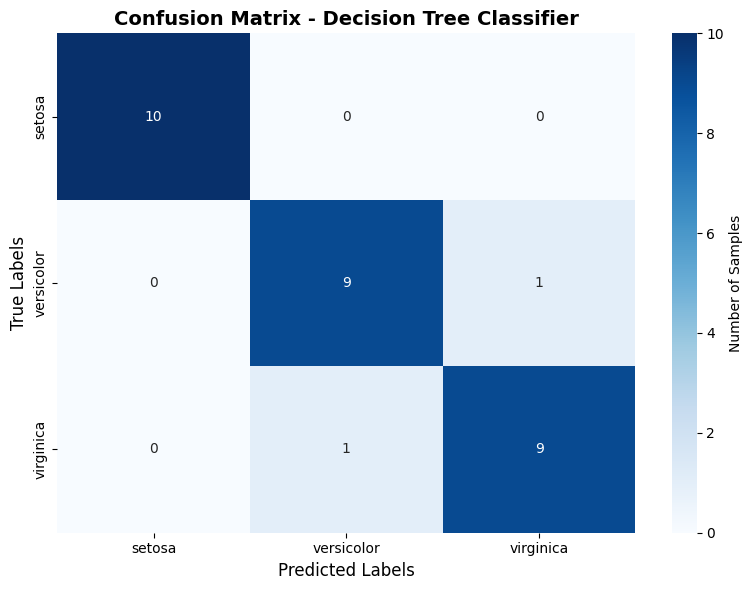

Confusion Matrix Interpretation:
setosa: 10/10 correctly classified
versicolor: 9/10 correctly classified
virginica: 9/10 correctly classified


In [ ]:
# ============================================================================
# SECTION 8: CONFUSION MATRIX VISUALIZATION
# ============================================================================

print("CONFUSION MATRIX VISUALIZATION:")

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names,
            cbar_kws={'label': 'Number of Samples'})

plt.title('Confusion Matrix - Decision Tree Classifier', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.tight_layout()
plt.show()

# Print confusion matrix interpretation
print("Confusion Matrix Interpretation:")
for i, class_name in enumerate(iris.target_names):
    true_positives = cm[i, i]
    total_actual = cm[i, :].sum()
    total_predicted = cm[:, i].sum()
    print(f"{class_name}: {true_positives}/{total_actual} correctly classified")

print("="*60)

In [ ]:
# ============================================================================
# SECTION 9: SAMPLE PREDICTIONS
# ============================================================================

print("SAMPLE PREDICTIONS:")

# Display some test samples with predictions
print("Sample predictions vs actual labels:")
print("-" * 80)
print(f"{'Index':<6} {'Actual':<12} {'Predicted':<12} {'Confidence':<12} {'Features'}")
print("-" * 80)

# Show first 10 test samples
for i in range(min(10, len(X_test))):
    actual_class = iris.target_names[y_test[i]]
    predicted_class = iris.target_names[y_pred[i]]

    # Get prediction probabilities
    proba = dt_classifier.predict_proba([X_test[i]])[0]
    confidence = max(proba) * 100

    features_str = f"[{X_test[i][0]:.1f}, {X_test[i][1]:.1f}, {X_test[i][2]:.1f}, {X_test[i][3]:.1f}]"

    print(f"{i:<6} {actual_class:<12} {predicted_class:<12} {confidence:.1f}%{'':<8} {features_str}")

print("-" * 80)

# Check for any misclassifications
misclassified = np.where(y_test != y_pred)[0]
if len(misclassified) > 0:
    print(f"\nMisclassified samples: {len(misclassified)}")
    for idx in misclassified:
        actual = iris.target_names[y_test[idx]]
        predicted = iris.target_names[y_pred[idx]]
        print(f"Sample {idx}: Actual={actual}, Predicted={predicted}")
else:
    print("\nPerfect classification! No misclassified samples.")

print("="*60)

SAMPLE PREDICTIONS:
Sample predictions vs actual labels:
--------------------------------------------------------------------------------
Index  Actual       Predicted    Confidence   Features
--------------------------------------------------------------------------------
0      setosa       setosa       100.0%         [4.4, 3.0, 1.3, 0.2]
1      virginica    virginica    100.0%         [6.1, 3.0, 4.9, 1.8]
2      versicolor   versicolor   100.0%         [4.9, 2.4, 3.3, 1.0]
3      versicolor   versicolor   100.0%         [5.0, 2.3, 3.3, 1.0]
4      setosa       setosa       100.0%         [4.4, 3.2, 1.3, 0.2]
5      versicolor   versicolor   100.0%         [6.3, 3.3, 4.7, 1.6]
6      setosa       setosa       100.0%         [4.6, 3.6, 1.0, 0.2]
7      setosa       setosa       100.0%         [5.4, 3.4, 1.7, 0.2]
8      virginica    virginica    100.0%         [6.5, 3.0, 5.2, 2.0]
9      versicolor   versicolor   100.0%         [5.4, 3.0, 4.5, 1.5]
------------------------------------

In [ ]:
# ============================================================================
# SECTION 10: ADDITIONAL INSIGHTS
# ============================================================================

print("ADDITIONAL INSIGHTS:")

# Tree structure analysis
print(f"Decision Tree Structure:")
print(f"- Maximum depth achieved: {dt_classifier.get_depth()}")
print(f"- Total number of nodes: {dt_classifier.tree_.node_count}")
print(f"- Number of leaves: {dt_classifier.get_n_leaves()}")

# Feature usage in the tree
print(f"\nMost important feature: {feature_names[np.argmax(feature_importance)]}")
print(f"Least important feature: {feature_names[np.argmin(feature_importance)]}")

# Model complexity
print(f"\nModel Complexity:")
print(f"- Training accuracy: {dt_classifier.score(X_train, y_train):.4f}")
print(f"- Testing accuracy: {accuracy:.4f}")
if dt_classifier.score(X_train, y_train) > accuracy + 0.05:
    print("- Warning: Possible overfitting detected!")
else:
    print("- Model shows good generalization!")

print("\n" + "="*60)
print("DECISION TREE ANALYSIS COMPLETED!")
print("="*60)


ADDITIONAL INSIGHTS:
Decision Tree Structure:
- Maximum depth achieved: 4
- Total number of nodes: 13
- Number of leaves: 7

Most important feature: petal length (cm)
Least important feature: sepal length (cm)

Model Complexity:
- Training accuracy: 0.9917
- Testing accuracy: 0.9333
- Warning: Possible overfitting detected!

DECISION TREE ANALYSIS COMPLETED!


In [ ]:
# ============================================================================
# SECTION 11: SAVE RESULTS (Optional)
# ============================================================================

print("SAVING RESULTS:")

# Create a summary report
summary_report = f"""
Decision Tree Classifier - Performance Summary
=============================================

Dataset: Iris Dataset
Training samples: {len(X_train)}
Testing samples: {len(X_test)}

Model Performance:
- Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)
- Precision: {precision:.4f} ({precision*100:.2f}%)
- Recall: {recall:.4f} ({recall*100:.2f}%)

Tree Structure:
- Max depth: {dt_classifier.get_depth()}
- Number of leaves: {dt_classifier.get_n_leaves()}
- Total nodes: {dt_classifier.tree_.node_count}

Feature Importance:
{importance_df.to_string(index=False)}

Misclassified samples: {len(misclassified)}
"""

print("Performance summary generated!")
print("\nTo save results to files, uncomment the following lines:")
print("# with open('decision_tree_summary.txt', 'w') as f:")
print("#     f.write(summary_report)")
print("# importance_df.to_csv('feature_importance.csv', index=False)")

print("\n" + "="*60)
print("TASK 1 COMPLETED SUCCESSFULLY!")
print("Decision Tree Implementation with Visualization and Analysis")
print("Ready for submission to ELiteTEch Internship Program")
print("="*60)

SAVING RESULTS:
Performance summary generated!

To save results to files, uncomment the following lines:
# with open('decision_tree_summary.txt', 'w') as f:
#     f.write(summary_report)
# importance_df.to_csv('feature_importance.csv', index=False)

TASK 1 COMPLETED SUCCESSFULLY!
Decision Tree Implementation with Visualization and Analysis
Ready for submission to ELiteTEch Internship Program
